In [1]:
from os.path import join
import matplotlib.pyplot as plt
import earthaccess

import geopandas as gpd
import rasters as rt

from harmonized_landsat_sentinel import harmonized_landsat_sentinel as HLS
from harmonized_landsat_sentinel import generate_HLS_timeseries

In [2]:
# Configure logging to see info messages
import logging
logging.basicConfig(level=logging.INFO, format='%(name)s - %(levelname)s - %(message)s')

date range

In [3]:
start_date_UTC = "2023-01-01"
end_date_UTC = "2023-12-31"

download directory

In [4]:
download_directory = "~/data/HLS_download"

output directory

In [5]:
output_directory = "~/data/Kings Canyon HLS 2023"

Upper Kings area of interest

In [6]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


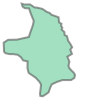

In [7]:
gdf.geometry[0]

In [8]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_86264/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=878372.1496506371, ymin=4058894.2146899896, xmax=917059.9433665382, ymax=4119262.3546824204, crs="EPSG:32610")

In [9]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1006,
    "cols": 644
  },
  "bbox": {
    "xmin": 878372.1496506371,
    "ymin": 4058902.3546824204,
    "xmax": 917012.1496506371,
    "ymax": 4119262.3546824204
  },
  "crs": "EPSG:32610",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [10]:
earthaccess.login(strategy="netrc", persist=True)

In [11]:
filenames = generate_HLS_timeseries(
    start_date_UTC=start_date_UTC,
    end_date_UTC=end_date_UTC,
    geometry=grid,
    download_directory=download_directory,
    output_directory=output_directory
)

filenames

[2025-11-17 09:32:10 INFO] Generating HLS timeseries with parameters:
[2025-11-17 09:32:10 INFO]   Bands: red, green, blue, NIR, SWIR1, SWIR2
[2025-11-17 09:32:10 INFO]   Tiles: 11SLB, 11SLA
[2025-11-17 09:32:10 INFO]   Start date: 2023-01-01
[2025-11-17 09:32:10 INFO]   End date: 2023-12-31
[2025-11-17 09:32:10 INFO]   Output directory: ~/data/Kings Canyon HLS 2023
[2025-11-17 09:32:10 INFO] Querying tile: 11SLB
[2025-11-17 09:32:10 INFO] started listing available HLS2 granules at tile 11SLB from 2023-01-01 to 2023-12-31
[2025-11-17 09:32:10 INFO] searching HLSS30.v2.0, HLSL30.v2.0 at 11SLB from 2022-12-16 to 2023-12-31
[2025-11-17 09:32:12 INFO] Currently storing 228 DataGranules for HLS2
[2025-11-17 09:32:12 INFO] finished listing available HLS2 granules at tile 11SLB from 2023-01-01 to 2023-12-31 (2.08)
[2025-11-17 09:32:12 INFO] 190 dates available for tile 11SLB:
[2025-11-17 09:32:12 INFO]   * 2023-01-01
[2025-11-17 09:32:12 INFO]   * 2023-01-03
[2025-11-17 09:32:12 INFO]   * 202

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:26 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:27 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:27 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:34 INFO] extracting band red for tile 11SLA on date 2023-01-01
[2025-11-17 09:32:34 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:32:34 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:32:34 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:44 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:32:44 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:32:44 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:49 INFO] extracting band green for tile 11SLB on date 2023-01-01
[2025-11-17 09:32:49 INFO] searching for Sentinel tile 11SLB on 2023-01-01
[2025-11-17 09:32:49 INFO] retrieving Sentinel tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLB.2023001T184759.v2.0
[2025-11-17 09:32:49 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B11.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B10.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.S30.T11SLB.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:49 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:49 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:49 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B06.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:49 INFO] File HLS.L30.T11SLB.2023001T18275

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:50 INFO] extracting band green for tile 11SLA on date 2023-01-01
[2025-11-17 09:32:50 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:32:50 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:32:50 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.S30.T11SLA.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:50 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:32:50 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:32:50 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B05.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:50 INFO] File HLS.L30.T11SLA.2023001T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:51 INFO] extracting band blue for tile 11SLB on date 2023-01-01
[2025-11-17 09:32:51 INFO] searching for Sentinel tile 11SLB on 2023-01-01
[2025-11-17 09:32:51 INFO] retrieving Sentinel tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLB.2023001T184759.v2.0
[2025-11-17 09:32:51 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B11.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B10.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.S30.T11SLB.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:51 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:51 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:51 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B06.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:51 INFO] File HLS.L30.T11SLB.2023001T18275

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:53 INFO] extracting band blue for tile 11SLA on date 2023-01-01
[2025-11-17 09:32:53 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:32:53 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:32:53 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B05.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.S30.T11SLA.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:53 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:32:53 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:32:53 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B05.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:53 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B06.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:54 INFO] extracting band NIR for tile 11SLB on date 2023-01-01
[2025-11-17 09:32:54 INFO] searching for Sentinel tile 11SLB on 2023-01-01
[2025-11-17 09:32:54 INFO] retrieving Sentinel tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLB.2023001T184759.v2.0
[2025-11-17 09:32:54 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B11.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B10.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.S30.T11SLB.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:54 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:54 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:54 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B06.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:54 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B05.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:55 INFO] extracting band NIR for tile 11SLA on date 2023-01-01
[2025-11-17 09:32:55 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:32:55 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:32:55 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.S30.T11SLA.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:55 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:32:55 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:32:55 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B05.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:55 INFO] File HLS.L30.T11SLA.2023001T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:57 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-01
[2025-11-17 09:32:57 INFO] searching for Sentinel tile 11SLB on 2023-01-01
[2025-11-17 09:32:57 INFO] retrieving Sentinel tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLB.2023001T184759.v2.0
[2025-11-17 09:32:57 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B11.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B10.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.S30.T11SLB.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:57 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:57 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:57 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B06.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:57 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B05.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] extracting band SWIR1 for tile 11SLA on date 2023-01-01
[2025-11-17 09:32:58 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:32:58 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:32:58 INFO]  Getting 1 granules, approx download size: 0.24 GB


/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B02.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.S30.T11SLA.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:32:58 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:32:58 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B05.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:58 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B06.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:32:59 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-01
[2025-11-17 09:32:59 INFO] searching for Sentinel tile 11SLB on 2023-01-01
[2025-11-17 09:32:59 INFO] retrieving Sentinel tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLB.2023001T184759.v2.0
[2025-11-17 09:32:59 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B11.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B10.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.S30.T11SLB.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:32:59 INFO] searching for Landsat tile 11SLB on 2023-01-01
[2025-11-17 09:32:59 INFO] retrieving Landsat tile 11SLB on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLB.2023001T182757.v2.0
[2025-11-17 09:32:59 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B06.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B03.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:32:59 INFO] File HLS.L30.T11SLB.2023001T182757.v2.0.B05.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:01 INFO] extracting band SWIR2 for tile 11SLA on date 2023-01-01
[2025-11-17 09:33:01 INFO] searching for Sentinel tile 11SLA on 2023-01-01
[2025-11-17 09:33:01 INFO] retrieving Sentinel tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.S30.T11SLA.2023001T184759.v2.0
[2025-11-17 09:33:01 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B03.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B09.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B07.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B01.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B06.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B12.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B04.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.B08.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T184759.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.S30.T11SLA.2023001T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:01 INFO] searching for Landsat tile 11SLA on 2023-01-01
[2025-11-17 09:33:01 INFO] retrieving Landsat tile 11SLA on 2023-01-01: ~/data/HLS_download/2023.01.01/HLS.L30.T11SLA.2023001T182757.v2.0
[2025-11-17 09:33:01 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B11.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B01.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B04.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B05.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B10.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B02.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B09.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.B07.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182757.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:01 INFO] File HLS.L30.T11SLA.2023001T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:02 INFO] extracting band red for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:02 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:02 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:02 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:06 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:06 INFO] extracting band red for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:06 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:06 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:06 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:10 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:11 INFO] extracting band green for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:11 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:11 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:11 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLB.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:11 INFO] extracting band green for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:11 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:11 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:11 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:11 INFO] File HLS.S30.T11SLA.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:11 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:11 INFO] extracting band blue for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:11 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:11 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:11 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:12 INFO] extracting band blue for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:12 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:12 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:12 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLA.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:12 INFO] extracting band NIR for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:12 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:12 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:12 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:12 INFO] File HLS.S30.T11SLB.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:12 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:13 INFO] extracting band NIR for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:13 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:13 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:13 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:13 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:13 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:13 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:13 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLB.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:13 INFO] extracting band SWIR1 for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:13 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:13 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:13 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:13 INFO] File HLS.S30.T11SLA.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:13 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:14 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-03
[2025-11-17 09:33:14 INFO] searching for Sentinel tile 11SLB on 2023-01-03
[2025-11-17 09:33:14 INFO] retrieving Sentinel tile 11SLB on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLB.2023003T183751.v2.0
[2025-11-17 09:33:14 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLB.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] searching for Landsat tile 11SLB on 2023-01-03
[2025-11-17 09:33:14 INFO] extracting band SWIR2 for tile 11SLA on date 2023-01-03
[2025-11-17 09:33:14 INFO] searching for Sentinel tile 11SLA on 2023-01-03
[2025-11-17 09:33:14 INFO] retrieving Sentinel tile 11SLA on 2023-01-03: ~/data/HLS_download/2023.01.03/HLS.S30.T11SLA.2023003T183751.v2.0
[2025-11-17 09:33:14 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:14 INFO] File HLS.S30.T11SLA.2023003T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:14 INFO] searching for Landsat tile 11SLA on 2023-01-03
[2025-11-17 09:33:14 INFO] extracting band red for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:14 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:14 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:14 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:20 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:21 INFO] extracting band red for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:21 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:21 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:21 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:27 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:27 INFO] extracting band green for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:27 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:27 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:27 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:27 INFO] File HLS.S30.T11SLB.2023006T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:27 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:27 INFO] extracting band green for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:27 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:28 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:28 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:28 INFO] extracting band blue for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:28 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:28 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:28 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLB.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:28 INFO] extracting band blue for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:28 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:28 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:28 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:28 INFO] File HLS.S30.T11SLA.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:28 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:29 INFO] extracting band NIR for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:29 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:29 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:29 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLB.2023006T18475

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:29 INFO] extracting band NIR for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:29 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:29 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:29 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:29 INFO] File HLS.S30.T11SLA.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:29 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:30 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:30 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:30 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:30 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:30 INFO] extracting band SWIR1 for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:30 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:30 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:30 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLA.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:30 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-06
[2025-11-17 09:33:30 INFO] searching for Sentinel tile 11SLB on 2023-01-06
[2025-11-17 09:33:30 INFO] retrieving Sentinel tile 11SLB on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLB.2023006T184751.v2.0
[2025-11-17 09:33:30 INFO]  Getting 1 granules, approx download size: 0.25 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B08.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B10.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B02.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B11.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:30 INFO] File HLS.S30.T11SLB.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:30 INFO] searching for Landsat tile 11SLB on 2023-01-06
[2025-11-17 09:33:31 INFO] extracting band SWIR2 for tile 11SLA on date 2023-01-06
[2025-11-17 09:33:31 INFO] searching for Sentinel tile 11SLA on 2023-01-06
[2025-11-17 09:33:31 INFO] retrieving Sentinel tile 11SLA on 2023-01-06: ~/data/HLS_download/2023.01.06/HLS.S30.T11SLA.2023006T184751.v2.0
[2025-11-17 09:33:31 INFO]  Getting 1 granules, approx download size: 0.24 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B07.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B09.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B12.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B06.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B01.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B05.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B03.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.B04.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184751.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:31 INFO] File HLS.S30.T11SLA.2023006T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:31 INFO] searching for Landsat tile 11SLA on 2023-01-06
[2025-11-17 09:33:31 INFO] extracting band red for tile 11SLB on date 2023-01-08
[2025-11-17 09:33:31 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:33:31 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:33:31 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:35 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:33:35 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:33:35 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:41 INFO] extracting band red for tile 11SLA on date 2023-01-08
[2025-11-17 09:33:41 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:33:41 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:33:41 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:45 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:33:45 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:33:45 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:51 INFO] extracting band green for tile 11SLB on date 2023-01-08
[2025-11-17 09:33:51 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:33:51 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:33:51 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B12.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B11.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.S30.T11SLB.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:51 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:33:51 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:33:51 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B11.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:51 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:52 INFO] extracting band green for tile 11SLA on date 2023-01-08
[2025-11-17 09:33:52 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:33:52 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:33:52 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B09.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B01.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.S30.T11SLA.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:52 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:33:52 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:33:52 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:33:52 INFO] File HLS.L30.T11SLA.2023008T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:54 INFO] extracting band blue for tile 11SLB on date 2023-01-08
[2025-11-17 09:33:54 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:33:54 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:33:54 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B12.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B11.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.S30.T11SLB.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:54 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:33:54 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:33:54 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:54 INFO] File HLS.L30.T11SLB.2023008T18340

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:55 INFO] extracting band blue for tile 11SLA on date 2023-01-08
[2025-11-17 09:33:55 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:33:55 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:33:55 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B09.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B01.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.S30.T11SLA.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:55 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:33:55 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:33:55 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:33:55 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B11.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:56 INFO] extracting band NIR for tile 11SLB on date 2023-01-08
[2025-11-17 09:33:56 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:33:56 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:33:56 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.S30.T11SLB.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:56 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:33:56 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:33:56 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B11.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:56 INFO] File HLS.L30.T11SLB.2023008T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:58 INFO] extracting band NIR for tile 11SLA on date 2023-01-08
[2025-11-17 09:33:58 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:33:58 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:33:58 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B01.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.S30.T11SLA.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:58 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:33:58 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:33:58 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:58 INFO] File HLS.L30.T11SLA.2023008T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:33:59 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-08
[2025-11-17 09:33:59 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:33:59 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:33:59 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B12.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B11.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.S30.T11SLB.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:33:59 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:33:59 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:33:59 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B11.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:33:59 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:34:01 INFO] extracting band SWIR1 for tile 11SLA on date 2023-01-08
[2025-11-17 09:34:01 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:34:01 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:34:01 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B09.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B11.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.S30.T11SLA.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:01 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:34:01 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:34:01 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:34:01 INFO] File HLS.L30.T11SLA.2023008T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:34:02 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-08
[2025-11-17 09:34:02 INFO] searching for Sentinel tile 11SLB on 2023-01-08
[2025-11-17 09:34:02 INFO] retrieving Sentinel tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLB.2023008T183739.v2.0
[2025-11-17 09:34:02 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B12.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B06.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T183739.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.S30.T11SLB.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:02 INFO] searching for Landsat tile 11SLB on 2023-01-08
[2025-11-17 09:34:02 INFO] retrieving Landsat tile 11SLB on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLB.2023008T183406.v2.0
[2025-11-17 09:34:02 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B11.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.B04.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:02 INFO] File HLS.L30.T11SLB.2023008T183406.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:34:03 INFO] extracting band SWIR2 for tile 11SLA on date 2023-01-08
[2025-11-17 09:34:03 INFO] searching for Sentinel tile 11SLA on 2023-01-08
[2025-11-17 09:34:03 INFO] retrieving Sentinel tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.S30.T11SLA.2023008T183739.v2.0
[2025-11-17 09:34:03 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B02.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B09.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B03.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B05.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B07.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B01.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B10.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B04.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T183739.v2.0.B08.tif already downloaded
[2025-11-17 09:34:03 INFO] File HLS.S30.T11SLA.2023008T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:03 INFO] searching for Landsat tile 11SLA on 2023-01-08
[2025-11-17 09:34:04 INFO] retrieving Landsat tile 11SLA on 2023-01-08: ~/data/HLS_download/2023.01.08/HLS.L30.T11SLA.2023008T183406.v2.0
[2025-11-17 09:34:04 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B05.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B09.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B01.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B07.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B10.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B03.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B06.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B02.tif already downloaded
[2025-11-17 09:34:04 INFO] File HLS.L30.T11SLA.2023008T183406.v2.0.B11.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:34:05 INFO] extracting band red for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:05 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:05 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:05 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:06 ERROR] Error while downloading the file HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:06 ERROR] Error while downloading the file HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:06 ERROR] Error while downloading the file HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:08 ERROR] 
[2025-11-17 09:34:08 INFO] extracting band red for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:08 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:08 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:08 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:09 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B01.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.B01.tif'
[2025-11-17 09:34:09 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B11.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.B11.tif'


COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:11 ERROR] 
[2025-11-17 09:34:11 INFO] extracting band green for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:11 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:11 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:11 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B11.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B09.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:11 INFO] File HLS.S30.T11SLB.2023011T18472

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:12 ERROR] 
[2025-11-17 09:34:12 INFO] extracting band green for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:12 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:12 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:12 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:13 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.VZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.VZA.tif'
[2025-11-17 09:34:13 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B11.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.B11.tif'


COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:15 ERROR] 
[2025-11-17 09:34:15 INFO] extracting band blue for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:15 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:15 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:15 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B11.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B09.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:15 INFO] File HLS.S30.T11SLB.2023011T18472

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:16 ERROR] 
[2025-11-17 09:34:16 INFO] extracting band blue for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:16 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:16 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:16 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:16 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:17 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.SAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.SAA.tif'
[2025-11-17 09:34:17 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B01.tif
Traceback (most re

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:18 ERROR] 
[2025-11-17 09:34:18 INFO] extracting band NIR for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:18 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:18 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:18 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B11.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B09.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:18 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B06.tif already downloaded
[2025-11-17 09:34:19 ERROR] Error while downloading the file

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:19 ERROR] 
[2025-11-17 09:34:19 INFO] extracting band NIR for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:19 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:19 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:19 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:19 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:20 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B8A.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.B8A.tif'
[2025-11-17 09:34:20 ERROR] 

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:21 ERROR] 
[2025-11-17 09:34:21 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:21 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:21 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:21 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B11.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B09.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:21 INFO] File HLS.S30.T11SLB.2023011T18472

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:22 ERROR] 
[2025-11-17 09:34:22 INFO] extracting band SWIR1 for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:22 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:22 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:22 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:22 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:23 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B01.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:23 ERROR] Error while downloading the file HLS.S30.T11SLA.2023011T184729.v2.0.B08.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskro

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 ERROR] 
[2025-11-17 09:34:24 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-11
[2025-11-17 09:34:24 INFO] searching for Sentinel tile 11SLB on 2023-01-11
[2025-11-17 09:34:24 INFO] retrieving Sentinel tile 11SLB on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLB.2023011T184729.v2.0
[2025-11-17 09:34:24 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B11.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B07.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B09.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLB.2023011T18472

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] searching for Landsat tile 11SLB on 2023-01-11
[2025-11-17 09:34:24 INFO] GDAL signalled an error: err_no=1, msg='TIFFFillTile:Read error at row 4294967295, col 4294967295, tile 0; got 0 bytes, expected 90195'
[2025-11-17 09:34:24 INFO] GDAL signalled an error: err_no=1, msg='TIFFReadEncodedTile() failed.'
[2025-11-17 09:34:24 INFO] GDAL signalled an error: err_no=1, msg='HLS.S30.T11SLB.2023011T184729.v2.0.B12.tif, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedTile() failed.'
[2025-11-17 09:34:24 ERROR] Sentinel product 'SWIR2' is not available at 11SLB on 2023-01-11
[2025-11-17 09:34:24 INFO] extracting band SWIR2 for tile 11SLA on date 2023-01-11
[2025-11-17 09:34:24 INFO] searching for Sentinel tile 11SLA on 2023-01-11
[2025-11-17 09:34:24 INFO] retrieving Sentinel tile 11SLA on 2023-01-11: ~/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0
[2025-11-17 09:34:24 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B03.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B12.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B01.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B05.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B08.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B04.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B02.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.B10.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184729.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:24 INFO] File HLS.S30.T11SLA.2023011T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:24 INFO] searching for Landsat tile 11SLA on 2023-01-11
[2025-11-17 09:34:24 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.01.11/HLS.S30.T11SLA.2023011T184729.v2.0/HLS.S30.T11SLA.2023011T184729.v2.0.B12.tif' not recognized as being in a supported file format."
[2025-11-17 09:34:24 ERROR] Sentinel product 'SWIR2' is not available at 11SLA on 2023-01-11
[2025-11-17 09:34:24 INFO] extracting band red for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:24 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:24 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:24 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:26 ERROR] Error while downloading the file HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:26 ERROR] Error while downloading the file HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:26 ERROR] Error while downloading the file HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:27 ERROR] 
[2025-11-17 09:34:27 INFO] extracting band green for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:27 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:27 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:27 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B12.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B08.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B06.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B07.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B03.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B01.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B10.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:27 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B02.tif already downloaded
[2025-11-17 09:34:28 ERROR] Error while downloading the file

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:28 ERROR] 
[2025-11-17 09:34:28 INFO] extracting band blue for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:28 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:28 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:28 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B06.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B08.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B07.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B03.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B01.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B10.tif already downloaded
[2025-11-17 09:34:28 INFO] File HLS.S30.T11SLB.2023013T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:30 ERROR] 
[2025-11-17 09:34:30 INFO] extracting band NIR for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:30 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:30 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:30 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B12.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B08.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B06.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B07.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B03.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B01.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B10.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:30 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B02.tif already downloaded
[2025-11-17 09:34:31 ERROR] Error while downloading the file

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:31 ERROR] 
[2025-11-17 09:34:31 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:31 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:31 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:31 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B12.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B06.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B08.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B07.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B03.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B01.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B10.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:31 INFO] File HLS.S30.T11SLB.2023013T18373

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:33 ERROR] 
[2025-11-17 09:34:33 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-13
[2025-11-17 09:34:33 INFO] searching for Sentinel tile 11SLB on 2023-01-13
[2025-11-17 09:34:33 INFO] retrieving Sentinel tile 11SLB on 2023-01-13: ~/data/HLS_download/2023.01.13/HLS.S30.T11SLB.2023013T183731.v2.0
[2025-11-17 09:34:33 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B09.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B12.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B05.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B06.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B08.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B07.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B03.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B01.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B10.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:33 INFO] File HLS.S30.T11SLB.2023013T183731.v2.0.B02.tif already downloaded
[2025-11-17 09:34:34 ERROR] Error while downloading the file

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:34 ERROR] 
[2025-11-17 09:34:34 INFO] extracting band red for tile 11SLB on date 2023-01-16
[2025-11-17 09:34:34 INFO] searching for Sentinel tile 11SLB on 2023-01-16
[2025-11-17 09:34:34 INFO] retrieving Sentinel tile 11SLB on 2023-01-16: ~/data/HLS_download/2023.01.16/HLS.S30.T11SLB.2023016T184721.v2.0
[2025-11-17 09:34:34 INFO]  Getting 1 granules, approx download size: 0.23 GB
[2025-11-17 09:34:34 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.16'
[2025-11-17 09:34:34 INFO] extracting band red for tile 11SLA on date 2023-01-16
[2025-11-17 09:34:34 INFO] searching for Sentinel tile 11SLA on 2023-01-16
[2025-11-17 09:34:34 INFO] retrieving Sentinel tile 11SLA on 2023-01-16: ~/data/HLS_download/2023.01.16/HLS.S30.T11SLA.2023016T184721.v2.0
[2025-11-17 09:34:34 INFO]  Getting 1 granules, approx download size: 0.22 GB
[2025-11-17 09:34:34 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.16'
[20

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:37 ERROR] Error while downloading the file HLS.S30.T11SLA.2023018T183709.v2.0.B01.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:37 ERROR] Error while downloading the file HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:37 ERROR] Error while downloading the file HLS.S30.T11SLA.2023018T183709.v2.0.B06.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 ERROR] 
[2025-11-17 09:34:39 INFO] extracting band blue for tile 11SLB on date 2023-01-18
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLB on 2023-01-18
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLB on 2023-01-18: ~/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.12 GB
[2025-11-17 09:34:39 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0'
[2025-11-17 09:34:39 INFO] extracting band blue for tile 11SLA on date 2023-01-18
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLA on 2023-01-18: ~/data/HLS_download/2023.01.18/HLS.S30.T11SLA.2023018T183709.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B02.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B06.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B01.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B03.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B11.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B04.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B08.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B12.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B09.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] searching for Landsat tile 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLA.2023018T183709.v2.0/HLS.S30.T11SLA.2023018T183709.v2.0.B02.tif' not recognized as being in a supported file format."
[2025-11-17 09:34:39 ERROR] Sentinel product 'blue' is not available at 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] extracting band NIR for tile 11SLB on date 2023-01-18
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLB on 2023-01-18
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLB on 2023-01-18: ~/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.12 GB
[2025-11-17 09:34:39 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0'
[2025-11-17 09:34:39 INFO] extracting band NIR for tile 11SLA on date 

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B02.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B01.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B05.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B03.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B11.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B04.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B08.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B12.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T18370

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] searching for Landsat tile 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=1, msg='TIFFFillTile:Read error at row 1024, col 1024, tile 65; got 0 bytes, expected 82794'
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=1, msg='TIFFReadEncodedTile() failed.'
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=1, msg='HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif, band 1: IReadBlock failed at X offset 5, Y offset 4: TIFFReadEncodedTile() failed.'
[2025-11-17 09:34:39 ERROR] Sentinel product 'NIR' is not available at 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] extracting band SWIR1 for tile 11SLB on date 2023-01-18
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLB on 2023-01-18
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLB on 2023-01-18: ~/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.12 GB
[2025-11-17 09:

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B02.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B06.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B01.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B05.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B04.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B11.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B10.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B12.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B03.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B09.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] searching for Landsat tile 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLA.2023018T183709.v2.0/HLS.S30.T11SLA.2023018T183709.v2.0.B11.tif' not recognized as being in a supported file format."
[2025-11-17 09:34:39 ERROR] Sentinel product 'SWIR1' is not available at 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] extracting band SWIR2 for tile 11SLB on date 2023-01-18
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLB on 2023-01-18
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLB on 2023-01-18: ~/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.12 GB
[2025-11-17 09:34:39 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLB.2023018T183709.v2.0'
[2025-11-17 09:34:39 INFO] extracting band SWIR2 for tile 11SLA on 

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B02.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B01.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B05.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B8A.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B03.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B11.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B04.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B08.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.B12.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T183709.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:39 INFO] File HLS.S30.T11SLA.2023018T18370

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:34:39 INFO] searching for Landsat tile 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.01.18/HLS.S30.T11SLA.2023018T183709.v2.0/HLS.S30.T11SLA.2023018T183709.v2.0.B12.tif' not recognized as being in a supported file format."
[2025-11-17 09:34:39 ERROR] Sentinel product 'SWIR2' is not available at 11SLA on 2023-01-18
[2025-11-17 09:34:39 INFO] extracting band red for tile 11SLB on date 2023-01-21
[2025-11-17 09:34:39 INFO] searching for Sentinel tile 11SLB on 2023-01-21
[2025-11-17 09:34:39 INFO] retrieving Sentinel tile 11SLB on 2023-01-21: ~/data/HLS_download/2023.01.21/HLS.S30.T11SLB.2023021T184659.v2.0
[2025-11-17 09:34:39 INFO]  Getting 1 granules, approx download size: 0.07 GB
[2025-11-17 09:34:39 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.01.21'
[2025-11-17 09:34:39 INFO] extracting band red for tile 11SLA on date 2023-01-21
[2025-11-17 09:34:39 IN

QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:55 ERROR] Error while downloading the file HLS.L30.T11SLA.2023065T182732.v2.0.VAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:55 ERROR] Error while downloading the file HLS.L30.T11SLA.2023065T182732.v2.0.B07.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:55 ERROR] Error while downloading the file HLS.L30.T11SLA.2023065T182732.v2.0.B10.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:57 ERROR] 
[2025-11-17 09:34:57 INFO] extracting band NIR for tile 11SLB on date 2023-03-06
[2025-11-17 09:34:57 INFO] searching for Sentinel tile 11SLB on 2023-03-06
[2025-11-17 09:34:57 INFO] searching for Landsat tile 11SLB on 2023-03-06
[2025-11-17 09:34:57 INFO] retrieving Landsat tile 11SLB on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLB.2023065T182732.v2.0
[2025-11-17 09:34:57 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:58 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.VZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:58 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:34:58 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B07.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 ERROR] 
[2025-11-17 09:34:59 INFO] extracting band NIR for tile 11SLA on date 2023-03-06
[2025-11-17 09:34:59 INFO] searching for Sentinel tile 11SLA on 2023-03-06
[2025-11-17 09:34:59 INFO] searching for Landsat tile 11SLA on 2023-03-06
[2025-11-17 09:34:59 INFO] retrieving Landsat tile 11SLA on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLA.2023065T182732.v2.0
[2025-11-17 09:34:59 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B11.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B03.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B07.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SAA.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B02.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B10.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B04.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B06.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.Fmask.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B09.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SZA.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLA.2023065T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.03.06/HLS.L30.T11SLA.2023065T182732.v2.0/HLS.L30.T11SLA.2023065T182732.v2.0.B05.tif' not recognized as being in a supported file format."
[2025-11-17 09:34:59 ERROR] Landsat product 'NIR' is not available at 11SLA on 2023-03-06
[2025-11-17 09:34:59 INFO] extracting band SWIR1 for tile 11SLB on date 2023-03-06
[2025-11-17 09:34:59 INFO] searching for Sentinel tile 11SLB on 2023-03-06
[2025-11-17 09:34:59 INFO] searching for Landsat tile 11SLB on 2023-03-06
[2025-11-17 09:34:59 INFO] retrieving Landsat tile 11SLB on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLB.2023065T182732.v2.0
[2025-11-17 09:34:59 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B07.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.VZA.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B11.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B03.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.VAA.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B02.tif already downloaded
[2025-11-17 09:34:59 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B01.tif already downloaded
[2025-11-17 09:35:00 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B04.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.06/HLS.L30.T11SLB.2023065T182732.v2.0/HLS.L30.T11SLB.2023065T182732.v2.0.B04.tif'
[2025-11-17 09:35:00 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B09.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 ERROR] 
[2025-11-17 09:35:00 INFO] extracting band SWIR1 for tile 11SLA on date 2023-03-06
[2025-11-17 09:35:00 INFO] searching for Sentinel tile 11SLA on 2023-03-06
[2025-11-17 09:35:00 INFO] searching for Landsat tile 11SLA on 2023-03-06
[2025-11-17 09:35:00 INFO] retrieving Landsat tile 11SLA on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLA.2023065T182732.v2.0
[2025-11-17 09:35:00 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B11.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B07.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B03.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B10.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B06.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B04.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B09.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B01.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B05.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.03.06/HLS.L30.T11SLA.2023065T182732.v2.0/HLS.L30.T11SLA.2023065T182732.v2.0.B06.tif' not recognized as being in a supported file format."
[2025-11-17 09:35:00 ERROR] Landsat product 'SWIR1' is not available at 11SLA on 2023-03-06
[2025-11-17 09:35:00 INFO] extracting band SWIR2 for tile 11SLB on date 2023-03-06
[2025-11-17 09:35:00 INFO] searching for Sentinel tile 11SLB on 2023-03-06
[2025-11-17 09:35:00 INFO] searching for Landsat tile 11SLB on 2023-03-06
[2025-11-17 09:35:00 INFO] retrieving Landsat tile 11SLB on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLB.2023065T182732.v2.0
[2025-11-17 09:35:00 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B07.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B11.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B05.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B02.tif already downloaded
[2025-11-17 09:35:00 INFO] File HLS.L30.T11SLB.2023065T182732.v2.0.B01.tif already downloaded
[2025-11-17 09:35:01 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B09.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.06/HLS.L30.T11SLB.2023065T182732.v2.0/HLS.L30.T11SLB.2023065T182732.v2.0.B09.tif'
[2025-11-17 09:35:01 ERROR] Error while downloading the file HLS.L30.T11SLB.2023065T182732.v2.0.B10.tif
Traceback (most rece

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:02 ERROR] 
[2025-11-17 09:35:02 INFO] extracting band SWIR2 for tile 11SLA on date 2023-03-06
[2025-11-17 09:35:02 INFO] searching for Sentinel tile 11SLA on 2023-03-06
[2025-11-17 09:35:02 INFO] searching for Landsat tile 11SLA on 2023-03-06
[2025-11-17 09:35:02 INFO] retrieving Landsat tile 11SLA on 2023-03-06: ~/data/HLS_download/2023.03.06/HLS.L30.T11SLA.2023065T182732.v2.0
[2025-11-17 09:35:02 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B11.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B07.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B03.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B02.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B04.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B10.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B06.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B09.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182732.v2.0.B01.tif already downloaded
[2025-11-17 09:35:02 INFO] File HLS.L30.T11SLA.2023065T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:02 INFO] GDAL signalled an error: err_no=1, msg='TIFFFillTile:Read error at row 4294967295, col 4294967295, tile 0; got 0 bytes, expected 569'
[2025-11-17 09:35:02 INFO] GDAL signalled an error: err_no=1, msg='TIFFReadEncodedTile() failed.'
[2025-11-17 09:35:02 INFO] GDAL signalled an error: err_no=1, msg='HLS.L30.T11SLA.2023065T182732.v2.0.B07.tif, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedTile() failed.'
[2025-11-17 09:35:02 ERROR] Landsat product 'SWIR2' is not available at 11SLA on 2023-03-06
[2025-11-17 09:35:02 INFO] extracting band red for tile 11SLB on date 2023-03-07
[2025-11-17 09:35:02 INFO] searching for Sentinel tile 11SLB on 2023-03-07
[2025-11-17 09:35:02 INFO] retrieving Sentinel tile 11SLB on 2023-03-07: ~/data/HLS_download/2023.03.07/HLS.S30.T11SLB.2023066T184221.v2.0
[2025-11-17 09:35:02 INFO]  Getting 1 granules, approx download size: 0.25 GB
[2025-11-17 09:35:02 ERROR] [Errno 28] No space left on device: '/Users/halverso/

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:07 ERROR] Error while downloading the file HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:07 ERROR] Error while downloading the file HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:08 ERROR] Error while downloading the file HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:09 ERROR] 
[2025-11-17 09:35:09 INFO] extracting band green for tile 11SLB on date 2023-03-22
[2025-11-17 09:35:09 INFO] searching for Sentinel tile 11SLB on 2023-03-22
[2025-11-17 09:35:09 INFO] retrieving Sentinel tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0
[2025-11-17 09:35:09 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:10 ERROR] Error while downloading the file HLS.S30.T11SLB.2023081T184039.v2.0.Fmask.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0/HLS.S30.T11SLB.2023081T184039.v2.0.Fmask.tif'
[2025-11-17 09:35:10 ERROR] Error while downloading the file HLS.S30.T11SLB.2023081T184039.v2.0.VAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0/HLS.S30.T11SLB.2023081T184039.v2.0.VAA.t

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:11 ERROR] 
[2025-11-17 09:35:11 INFO] extracting band green for tile 11SLA on date 2023-03-22
[2025-11-17 09:35:11 INFO] searching for Sentinel tile 11SLA on 2023-03-22
[2025-11-17 09:35:11 INFO] retrieving Sentinel tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLA.2023081T184039.v2.0
[2025-11-17 09:35:11 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B04.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:11 INFO] File HLS.S30.T11SLA.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:11 INFO] searching for Landsat tile 11SLA on 2023-03-22
[2025-11-17 09:35:12 INFO] retrieving Landsat tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0
[2025-11-17 09:35:12 INFO]  Getting 1 granules, approx download size: 0.13 GB
[2025-11-17 09:35:12 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0'
[2025-11-17 09:35:12 INFO] extracting band blue for tile 11SLB on date 2023-03-22
[2025-11-17 09:35:12 INFO] searching for Sentinel tile 11SLB on 2023-03-22
[2025-11-17 09:35:12 INFO] retrieving Sentinel tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0
[2025-11-17 09:35:12 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:13 ERROR] Error while downloading the file HLS.S30.T11SLB.2023081T184039.v2.0.B02.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:13 ERROR] Error while downloading the file HLS.S30.T11SLB.2023081T184039.v2.0.B8A.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:13 ERROR] Error while downloading the file HLS.S30.T11SLB.2023081T184039.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 ERROR] 
[2025-11-17 09:35:14 INFO] extracting band blue for tile 11SLA on date 2023-03-22
[2025-11-17 09:35:14 INFO] searching for Sentinel tile 11SLA on 2023-03-22
[2025-11-17 09:35:14 INFO] retrieving Sentinel tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLA.2023081T184039.v2.0
[2025-11-17 09:35:14 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLA.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] searching for Landsat tile 11SLA on 2023-03-22
[2025-11-17 09:35:14 INFO] retrieving Landsat tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0
[2025-11-17 09:35:14 INFO]  Getting 1 granules, approx download size: 0.13 GB
[2025-11-17 09:35:14 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0'
[2025-11-17 09:35:14 INFO] extracting band NIR for tile 11SLB on date 2023-03-22
[2025-11-17 09:35:14 INFO] searching for Sentinel tile 11SLB on 2023-03-22
[2025-11-17 09:35:14 INFO] retrieving Sentinel tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0
[2025-11-17 09:35:14 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B09.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B10.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:14 INFO] File HLS.S30.T11SLB.2023081T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:14 INFO] searching for Landsat tile 11SLB on 2023-03-22
[2025-11-17 09:35:14 INFO] retrieving Landsat tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0
[2025-11-17 09:35:14 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:16 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.SAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.SAA.tif'
[2025-11-17 09:35:16 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.B06.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.B06.tif'


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:17 ERROR] 
[2025-11-17 09:35:17 INFO] extracting band NIR for tile 11SLA on date 2023-03-22
[2025-11-17 09:35:17 INFO] searching for Sentinel tile 11SLA on 2023-03-22
[2025-11-17 09:35:17 INFO] retrieving Sentinel tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLA.2023081T184039.v2.0
[2025-11-17 09:35:17 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:17 INFO] File HLS.S30.T11SLA.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:17 INFO] searching for Landsat tile 11SLA on 2023-03-22
[2025-11-17 09:35:17 INFO] retrieving Landsat tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0
[2025-11-17 09:35:17 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:18 ERROR] Error while downloading the file HLS.L30.T11SLA.2023081T182723.v2.0.SZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0/HLS.L30.T11SLA.2023081T182723.v2.0.SZA.tif'
[2025-11-17 09:35:18 ERROR] Error while downloading the file HLS.L30.T11SLA.2023081T182723.v2.0.VZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0/HLS.L30.T11SLA.2023081T182723.v2.0.VZA.tif'


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:19 ERROR] 
[2025-11-17 09:35:19 INFO] extracting band SWIR1 for tile 11SLB on date 2023-03-22
[2025-11-17 09:35:19 INFO] searching for Sentinel tile 11SLB on 2023-03-22
[2025-11-17 09:35:19 INFO] retrieving Sentinel tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0
[2025-11-17 09:35:19 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B09.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B10.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:19 INFO] File HLS.S30.T11SLB.2023081T184

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:19 INFO] searching for Landsat tile 11SLB on 2023-03-22
[2025-11-17 09:35:19 INFO] retrieving Landsat tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0
[2025-11-17 09:35:19 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:20 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.VZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.VZA.tif'
[2025-11-17 09:35:20 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.Fmask.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.Fmask.t

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:21 ERROR] 
[2025-11-17 09:35:21 INFO] extracting band SWIR1 for tile 11SLA on date 2023-03-22
[2025-11-17 09:35:21 INFO] searching for Sentinel tile 11SLA on 2023-03-22
[2025-11-17 09:35:21 INFO] retrieving Sentinel tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLA.2023081T184039.v2.0
[2025-11-17 09:35:21 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B04.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B09.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.S30.T11SLA.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:21 INFO] searching for Landsat tile 11SLA on 2023-03-22
[2025-11-17 09:35:21 INFO] retrieving Landsat tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0
[2025-11-17 09:35:21 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B04.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B03.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B01.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B11.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:21 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:22 ERROR] Error while downloading the file HLS.L30.T11SLA.2023081T182723.v2.0.B10.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0/HLS.L30.T11SLA.2023081T182723.v2.0.B10.tif'
[2025-11-17 09:35:22 ERROR] 

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:22 ERROR] 
[2025-11-17 09:35:22 INFO] extracting band SWIR2 for tile 11SLB on date 2023-03-22
[2025-11-17 09:35:22 INFO] searching for Sentinel tile 11SLB on 2023-03-22
[2025-11-17 09:35:22 INFO] retrieving Sentinel tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLB.2023081T184039.v2.0
[2025-11-17 09:35:22 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B09.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B10.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B04.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:22 INFO] File HLS.S30.T11SLB.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:22 INFO] searching for Landsat tile 11SLB on 2023-03-22
[2025-11-17 09:35:22 INFO] retrieving Landsat tile 11SLB on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0
[2025-11-17 09:35:22 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:23 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.B04.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.B04.tif'
[2025-11-17 09:35:23 ERROR] Error while downloading the file HLS.L30.T11SLB.2023081T182723.v2.0.Fmask.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLB.2023081T182723.v2.0/HLS.L30.T11SLB.2023081T182723.v2.0.Fmask.t

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:24 ERROR] 
[2025-11-17 09:35:24 INFO] extracting band SWIR2 for tile 11SLA on date 2023-03-22
[2025-11-17 09:35:24 INFO] searching for Sentinel tile 11SLA on 2023-03-22
[2025-11-17 09:35:24 INFO] retrieving Sentinel tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.S30.T11SLA.2023081T184039.v2.0
[2025-11-17 09:35:24 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B07.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B05.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B02.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B11.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B08.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B03.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B01.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B12.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B06.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T184039.v2.0.B8A.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.S30.T11SLA.2023081T18403

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:35:24 INFO] searching for Landsat tile 11SLA on 2023-03-22
[2025-11-17 09:35:24 INFO] retrieving Landsat tile 11SLA on 2023-03-22: ~/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0
[2025-11-17 09:35:24 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B04.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B02.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B01.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.B11.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:24 INFO] File HLS.L30.T11SLA.2023081T182723.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:25 ERROR] Error while downloading the file HLS.L30.T11SLA.2023081T182723.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.22/HLS.L30.T11SLA.2023081T182723.v2.0/HLS.L30.T11SLA.2023081T182723.v2.0.B05.tif'
[2025-11-17 09:35:25 ERROR] Error while downloading the file HLS.L30.T11SLA.2023081T182723.v2.0.B07.tif
Traceback (most re

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:25 ERROR] 
[2025-11-17 09:35:25 INFO] extracting band red for tile 11SLB on date 2023-03-24
[2025-11-17 09:35:25 INFO] searching for Sentinel tile 11SLB on 2023-03-24
[2025-11-17 09:35:25 INFO] retrieving Sentinel tile 11SLB on 2023-03-24: ~/data/HLS_download/2023.03.24/HLS.S30.T11SLB.2023083T183021.v2.0
[2025-11-17 09:35:25 INFO]  Getting 1 granules, approx download size: 0.12 GB
[2025-11-17 09:35:25 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.24'
[2025-11-17 09:35:25 INFO] extracting band red for tile 11SLA on date 2023-03-24
[2025-11-17 09:35:25 INFO] searching for Sentinel tile 11SLA on 2023-03-24
[2025-11-17 09:35:25 INFO] retrieving Sentinel tile 11SLA on 2023-03-24: ~/data/HLS_download/2023.03.24/HLS.S30.T11SLA.2023083T183021.v2.0
[2025-11-17 09:35:25 INFO]  Getting 1 granules, approx download size: 0.17 GB
[2025-11-17 09:35:25 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.03.24'
[20

QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:38 ERROR] Error while downloading the file HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:38 ERROR] Error while downloading the file HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702, in _download_file
    f.write(chunk)
OSError: [Errno 28] No space left on device
[2025-11-17 09:35:38 ERROR] Error while downloading the file HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 702

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:39 ERROR] 
[2025-11-17 09:35:39 INFO] extracting band red for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:39 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:39 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:39 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:39 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:40 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.SZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/socket.py", line 967, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/minifor

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 ERROR] 
[2025-11-17 09:35:42 INFO] extracting band green for tile 11SLB on date 2023-05-08
[2025-11-17 09:35:42 INFO] searching for Sentinel tile 11SLB on 2023-05-08
[2025-11-17 09:35:42 INFO] searching for Landsat tile 11SLB on 2023-05-08
[2025-11-17 09:35:42 INFO] retrieving Landsat tile 11SLB on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0
[2025-11-17 09:35:42 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B10.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B09.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLB.2023128T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0/HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif' not recognized as being in a supported file format."
[2025-11-17 09:35:42 ERROR] Landsat product 'green' is not available at 11SLB on 2023-05-08
[2025-11-17 09:35:42 INFO] extracting band green for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:42 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:42 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:42 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:42 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:42 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:43 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.VZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0/HLS.L30.T11SLA.2023128T183322.v2.0.VZA.tif'
[2025-11-17 09:35:43 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.B10.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:43 ERROR] 
[2025-11-17 09:35:43 INFO] extracting band blue for tile 11SLB on date 2023-05-08
[2025-11-17 09:35:43 INFO] searching for Sentinel tile 11SLB on 2023-05-08
[2025-11-17 09:35:43 INFO] searching for Landsat tile 11SLB on 2023-05-08
[2025-11-17 09:35:43 INFO] retrieving Landsat tile 11SLB on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0
[2025-11-17 09:35:43 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B10.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B09.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VAA.tif already downloaded
[2025-11-17 09:35:43 INFO] File HLS.L30.T11SLB.2023128T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:43 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0/HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif' not recognized as being in a supported file format."
[2025-11-17 09:35:43 ERROR] Landsat product 'blue' is not available at 11SLB on 2023-05-08
[2025-11-17 09:35:43 INFO] extracting band blue for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:44 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:44 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:44 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:44 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B01.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:44 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:45 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.SZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0/HLS.L30.T11SLA.2023128T183322.v2.0.SZA.tif'
[2025-11-17 09:35:45 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 ERROR] 
[2025-11-17 09:35:45 INFO] extracting band NIR for tile 11SLB on date 2023-05-08
[2025-11-17 09:35:45 INFO] searching for Sentinel tile 11SLB on 2023-05-08
[2025-11-17 09:35:45 INFO] searching for Landsat tile 11SLB on 2023-05-08
[2025-11-17 09:35:45 INFO] retrieving Landsat tile 11SLB on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0
[2025-11-17 09:35:45 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B10.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B09.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLB.2023128T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 INFO] GDAL signalled an error: err_no=1, msg='TIFFFillTile:Read error at row 4294967295, col 4294967295, tile 0; got 0 bytes, expected 110048'
[2025-11-17 09:35:45 INFO] GDAL signalled an error: err_no=1, msg='TIFFReadEncodedTile() failed.'
[2025-11-17 09:35:45 INFO] GDAL signalled an error: err_no=1, msg='HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedTile() failed.'
[2025-11-17 09:35:45 ERROR] Landsat product 'NIR' is not available at 11SLB on 2023-05-08
[2025-11-17 09:35:45 INFO] extracting band NIR for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:45 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:45 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:45 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:45 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B01.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:45 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:46 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0/HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif'
[2025-11-17 09:35:46 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.B03.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:46 ERROR] 
[2025-11-17 09:35:46 INFO] extracting band SWIR1 for tile 11SLB on date 2023-05-08
[2025-11-17 09:35:46 INFO] searching for Sentinel tile 11SLB on 2023-05-08
[2025-11-17 09:35:46 INFO] searching for Landsat tile 11SLB on 2023-05-08
[2025-11-17 09:35:46 INFO] retrieving Landsat tile 11SLB on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0
[2025-11-17 09:35:46 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B10.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B09.tif already downloaded
[2025-11-17 09:35:46 INFO] File HLS.L30.T11SLB.2023128T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:46 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0/HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif' not recognized as being in a supported file format."
[2025-11-17 09:35:46 ERROR] Landsat product 'SWIR1' is not available at 11SLB on 2023-05-08
[2025-11-17 09:35:46 INFO] extracting band SWIR1 for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:46 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:46 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:46 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:46 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B01.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:47 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:48 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0/HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif'
[2025-11-17 09:35:48 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.B03.tif
Traceback (most rece

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 ERROR] 
[2025-11-17 09:35:48 INFO] extracting band SWIR2 for tile 11SLB on date 2023-05-08
[2025-11-17 09:35:48 INFO] searching for Sentinel tile 11SLB on 2023-05-08
[2025-11-17 09:35:48 INFO] searching for Landsat tile 11SLB on 2023-05-08
[2025-11-17 09:35:48 INFO] retrieving Landsat tile 11SLB on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0
[2025-11-17 09:35:48 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.SZA.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B06.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B03.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.VZA.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183322.v2.0.B09.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLB.2023128T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLB.2023128T183322.v2.0/HLS.L30.T11SLB.2023128T183322.v2.0.B07.tif' not recognized as being in a supported file format."
[2025-11-17 09:35:48 ERROR] Landsat product 'SWIR2' is not available at 11SLB on 2023-05-08
[2025-11-17 09:35:48 INFO] extracting band SWIR2 for tile 11SLA on date 2023-05-08
[2025-11-17 09:35:48 INFO] searching for Sentinel tile 11SLA on 2023-05-08
[2025-11-17 09:35:48 INFO] searching for Landsat tile 11SLA on 2023-05-08
[2025-11-17 09:35:48 INFO] retrieving Landsat tile 11SLA on 2023-05-08: ~/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0
[2025-11-17 09:35:48 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B02.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.Fmask.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B04.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.SAA.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B01.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B05.tif already downloaded
[2025-11-17 09:35:48 INFO] File HLS.L30.T11SLA.2023128T183322.v2.0.B11.tif already downloaded
[2025-11-17 09:35:49 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.SZA.tif
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/harmonized-landsat-sentinel/lib/python3.10/site-packages/earthaccess/store.py", line 698, in _download_file
    with open(path, "wb") as f:
OSError: [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.08/HLS.L30.T11SLA.2023128T183322.v2.0/HLS.L30.T11SLA.2023128T183322.v2.0.SZA.tif'
[2025-11-17 09:35:49 ERROR] Error while downloading the file HLS.L30.T11SLA.2023128T183322.v2.0.VAA.tif
Traceback (most rece

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:35:49 ERROR] 
[2025-11-17 09:35:49 INFO] extracting band red for tile 11SLB on date 2023-05-09
[2025-11-17 09:35:49 INFO] searching for Sentinel tile 11SLB on 2023-05-09
[2025-11-17 09:35:49 INFO] searching for Landsat tile 11SLB on 2023-05-09
[2025-11-17 09:35:49 INFO] retrieving Landsat tile 11SLB on 2023-05-09: ~/data/HLS_download/2023.05.09/HLS.L30.T11SLB.2023129T182652.v2.0
[2025-11-17 09:35:49 INFO]  Getting 1 granules, approx download size: 0.09 GB
[2025-11-17 09:35:49 ERROR] [Errno 28] No space left on device: '/Users/halverso/data/HLS_download/2023.05.09'
[2025-11-17 09:35:49 INFO] extracting band red for tile 11SLA on date 2023-05-09
[2025-11-17 09:35:49 INFO] searching for Sentinel tile 11SLA on 2023-05-09
[2025-11-17 09:35:49 INFO] searching for Landsat tile 11SLA on 2023-05-09
[2025-11-17 09:35:49 INFO] retrieving Landsat tile 11SLA on 2023-05-09: ~/data/HLS_download/2023.05.09/HLS.L30.T11SLA.2023129T182652.v2.0
[2025-11-17 09:35:49 INFO]  Getting 1 granules

[]